# Lecture 6: Rows, Columns, Images

Two dimensional data arrays are normally stored in column-major or row-major order. In row-major order adjacent elements in a row are stored next to each other in memory. In column-major order adjacent elements in a column are stored next to each other in memory. See also https://en.wikipedia.org/wiki/Matrix_representation


For the usual mathematical matrix notation $A_{ij}$, where $i$ is the row, and $j$ the column, we have in the case of a $3x4$ matrix:
$$
A = \begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14}\\
a_{21} & a_{22} & a_{23} & a_{24}\\
a_{31} & a_{32} & a_{33} & a_{34}\\
\end{bmatrix}
$$
or (zero-indexed):
$$
A = \begin{bmatrix}
a_{00} & a_{01} & a_{02} & a_{03}\\
a_{10} & a_{11} & a_{12} & a_{13}\\
a_{20} & a_{21} & a_{33} & a_{23}\\
\end{bmatrix}
$$
Classic languages such as Fortran store their arrays in so-called column-major order. **FDATA(NR,NC)**, and indices started at 1 with the first versions.
More modern language, such a C, store their arrays in row-major order,  **CDATA[NR][NC]**, with indices starting at 0.
```
    col major:   fdata(1,1),  fdata(2,1), ...        first index runs fastest 
    row major:   cdata[0][0], cdata[0][1], ...       last index runs fastest  
```
Examples of column major are: Fortran, [FITS], MatLab, IDL, R, Julia

Examples of row major are: C, Python, (java)

Images are often referred to in X and Y coordinates, like a mathematical system. The origin would be at (0,0) in the lower left corner. Image processing software normally puts the (0,0) origin at the top left corner, which corresponds a bit how the matrix above is printed. This, together with row-major and column-major can make it challenging to interchange data and plot them on the screen.

Add to this that for very large data, re-ordering axes can be a very expensive operation.

See also https://en.wikipedia.org/wiki/Iliffe_vector for another view on storing data in multi-dimensional arrays. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from astropy.io import fits         

Get the Header-Data-Units (hdu's) from a fits file. This particular one only has 1.

In [2]:
hdu = fits.open('../data/cube432.fits')
print(len(hdu))

1


In [34]:
h = hdu[0].header
d = hdu[0].data
print(d.shape)
print(d)



(2, 3, 4)
[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]


In [18]:
f=d[1,:,:]
print(f)

f[:,1:3]

[[ 100.  101.  102.  103.]
 [ 110.  111.  112.  113.]
 [ 120.  121.  122.  123.]]


array([[ 101.,  102.],
       [ 111.,  112.],
       [ 121.,  122.]], dtype=float32)

This 4x3x2 matrix can actually also be generated from scratch using basic numpy:

In [31]:


d1 = np.zeros(2*3*4).reshape(2,3,4)
dimensions = d1.shape
for z in range(dimensions[0]):
    for y in range(dimensions[1]):
        for x in range(dimensions[2]):
            d1[z,y,x] = x + 10*y + 100*z
print(d1)


d1.shape

[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]


(2, 3, 4)

In [22]:
np.arange(2*3*4).reshape((2,3,4))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [32]:
print(d1.flatten())

[   0.    1.    2.    3.   10.   11.   12.   13.   20.   21.   22.   23.
  100.  101.  102.  103.  110.  111.  112.  113.  120.  121.  122.  123.]


In [33]:
# are two arrays the same (or close enough?)
print(d)
print(d1)
np.allclose(d,d1)

[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]
[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]


True

## More slicing examples

For a 3-D array, you can think of things being indexed as [z,y,x]. Thus, a 2x3x4 matrix looks like what we have defined above.

In [35]:
d1 = np.zeros(2*3*4).reshape(2,3,4)
for z in range(2):
    for y in range(3):
        for x in range(4):
            d1[z,y,x] = x + 10*y + 100*z
print(d1)

print(d1[1])
print(d1[1,0,0:2])
print(d1[1,0:2,0])
print(d1[1,0:2,1::])
print(d1[1,1:3,1:-1])

[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]
[[ 100.  101.  102.  103.]
 [ 110.  111.  112.  113.]
 [ 120.  121.  122.  123.]]
[ 100.  101.]
[ 100.  110.]
[[ 101.  102.  103.]
 [ 111.  112.  113.]]
[[ 111.  112.]
 [ 121.  122.]]


In [38]:
d1 = np.zeros(2*3*4).reshape(2,3,4)
for z in range(2):
    for y in range(3):
        for x in range(4):
            d1[z,y,x] = x + 10*y + 100*z
print(d1)

print(d1[1])
print(d1[0,:,1:])

[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]
[[ 100.  101.  102.  103.]
 [ 110.  111.  112.  113.]
 [ 120.  121.  122.  123.]]
[[  1.   2.   3.]
 [ 11.  12.  13.]
 [ 21.  22.  23.]]


## Manipulating Axes

We now want to take a plane from this cube, and plot this in a heatmap or contour map. We are now faced deciding how columns and rows translate to X and Y on a plot. Math, Astronomy, Geography and Image Processing groups all differ a bit how they prefer to see this, so numpy comes  with a number of function to help you with this:

* np.reshape
* np.transpose (or T)
* np.flipud
* np.fliprd
* np.rot90
* np.swapaxes
* np.moveaxis

the important thing to realize is that they all give a new **view** of the array, which often is more efficient as moving the actual values.

[[  0.   1.   2.   3.]
 [ 10.  11.  12.  13.]
 [ 20.  21.  22.  23.]]


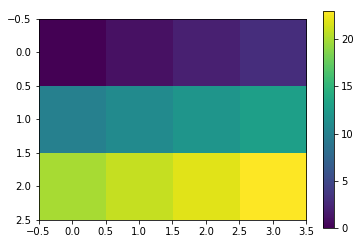

In [39]:
p0 = d[0,:,:]
p1 = d[1,:,:]
print(p0)
plt.imshow(p0)
plt.colorbar()

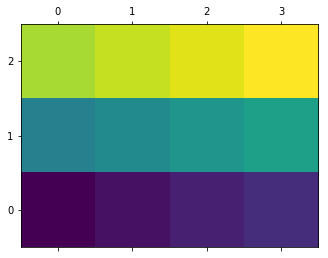

In [41]:
plt.matshow(p0,origin='lower')

Note that for a small 4x3 matrix this image has been artificially made smooth by interpolating in imshow(); however you can already see that the integer coordinates are at the center of a cell:  (0.0) is the center of the lower left cell. This is a little more obvious when you turn off interpolation:


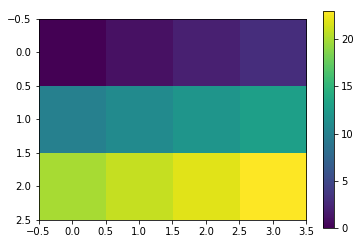

In [42]:
plt.imshow(p0,interpolation='none')
plt.colorbar()

if you want to print the array values on the terminal with 0 at the bottom left, use the np.flipup() function:

[[ 20.  21.  22.  23.]
 [ 10.  11.  12.  13.]
 [  0.   1.   2.   3.]]


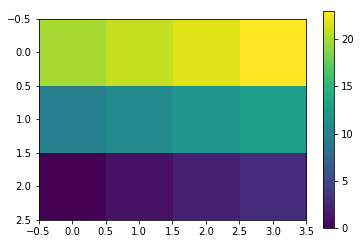

In [43]:
print(np.flipud(p0))
plt.imshow(np.flipud(p0),interpolation='none')
plt.colorbar()

In [44]:
import numpy.ma as ma

a = np.arange(4)
am = ma.masked_equal(a,2)
print(a.sum(),am.sum())
print(am.data,am.mask)

6 4
[0 1 2 3] [False False  True False]


### Arrray Transposing

In [45]:
%%time
n = 100
n1 = n  
n2 = n+1 
n3 = n+2
np.random.seed(123)
a = np.random.normal(size=n1*n2*n3).reshape(n1,n2,n3)
print(len(a.flatten()))
print(a[0,0,0])
a.flatten()[0]=-1
print(a[0,0,0])          # how come?

1030200
-1.0856306033
-1.0856306033
CPU times: user 72 ms, sys: 16 ms, total: 88 ms
Wall time: 153 ms


In [ ]:
%%time
b = a.transpose()
# note B is another view of A

## Inner and Outer loop order of execution

Set up a (random) square matrix and vector. Multiply the matrix with a vector and measure the performance difference if you order the loops differently.

In [ ]:
%%time 
n = 2
m = n+1
np.random.seed(123)
a = np.random.normal(size=m*n).reshape(m,n)
x = np.random.normal(size=n)
print(x[0])
#
#a = np.arange(n*n).reshape(n,n)
#x = np.arange(n)

In [ ]:
%%time
b = np.matmul(a,x)
print(a.shape,x.shape,b.shape)

In [ ]:
%%time
b1 = np.zeros(m)
for i in range(m):
    for j in range(n):
        b1[i] = b1[i] + a[i,j]*x[j]

In [ ]:
%%time
b2 = np.zeros(m)
for i in range(m):
    ai = a[i,:]
    b2[i] = np.inner(ai,x)

In [ ]:
%%time
b3 = np.zeros(m)
for j in range(n):
    for i in range(m):
        b3[i] = b3[i] + a[i,j]*x[j]

In [ ]:
if n < 3:
    print('a',a,'\nx',x)
    print('b',b,'\nb1',b1,'\nb2',b2,'\nb3',b3)
else:
    print(n)

### Matrix Inversion

In [46]:
from numpy.linalg import inv


In [55]:
n = 2
a1 = np.random.normal(size=n*n).reshape(n,n)

print(a1)

[[-1.20684312 -1.47942123]
 [ 0.73672062 -2.02930361]]


In [56]:
%%time
ainv = inv(a1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 199 µs


In [57]:
print(a1)
print(ainv)

np.matrix(a1) * np.matrix(ainv)

[[-1.20684312 -1.47942123]
 [ 0.73672062 -2.02930361]]
[[-0.57341625  0.41803709]
 [-0.20817367 -0.34101524]]


matrix([[  1.00000000e+00,   0.00000000e+00],
        [  1.11022302e-16,   1.00000000e+00]])

In [58]:
i1=np.matmul(a1,ainv)

In [ ]:
i0=np.eye(n)

In [ ]:
print(np.allclose(i0,i1,atol=1e-10))
print(i1)